In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.stats.mstats import winsorize

import seaborn as sns
# Set the style and color palette
sns.set(style="whitegrid")
pastel_colors = sns.color_palette("pastel")


#Data Loading And Preparation

In [ ]:
df1 = pd.read_excel("/content/online_retail_II.xlsx", sheet_name="Year 2009-2010")
df2 = pd.read_excel("/content/online_retail_II.xlsx", sheet_name="Year 2010-2011")

In [ ]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df1.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [ ]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df2.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,541910.000000,541910,541910.000000,406830.000000
mean,9.552234,2011-07-04 13:35:22.342307584,4.611138,15287.684160
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.080957,NaN,96.759765,1713.603074


In [ ]:

df = pd.concat([df1, df2], ignore_index=True)


#Exploratory Data Analysis


In [ ]:
df
# Customers come from multiple countries therefore we should narrow down scope to a few countries.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:

country_count = df['Country'].value_counts()


country_count
#Absolute majority of customers come from UK therefore we shall focus on UK only.

,count
Country,
United Kingdom,981330
EIRE,17866
Germany,17624
France,14330
Netherlands,5140
Spain,3811
Switzerland,3189
Belgium,3123
Portugal,2620


In [ ]:
df = df[df['Country'] == 'United Kingdom']


In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [ ]:
df.info()
#CustomerID column has much less non-null values.


<class 'pandas.core.frame.DataFrame'>
Index: 981330 entries, 0 to 1067354
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      981330 non-null  object        
 1   StockCode    981330 non-null  object        
 2   Description  976948 non-null  object        
 3   Quantity     981330 non-null  int64         
 4   InvoiceDate  981330 non-null  datetime64[ns]
 5   Price        981330 non-null  float64       
 6   Customer ID  741301 non-null  float64       
 7   Country      981330 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 67.4+ MB


In [ ]:
df.describe()
# There is negative values for Quantity which is illogical therefore it needs to be fixed.
# There is negative values for price which is illogical therefore it needs to be fixed.

,Quantity,InvoiceDate,Price,Customer ID
count,981330.000000,981330,981330.000000,741301.000000
mean,8.858259,2011-01-01 09:04:09.776283136,4.537892,15554.046300
min,-80995.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-07-07 11:25:00,1.250000,14203.000000
50%,3.000000,2010-12-06 16:57:00,2.100000,15551.000000
75%,10.000000,2011-07-20 16:17:00,4.150000,16936.000000
max,80995.000000,2011-12-09 12:49:00,38970.000000,18287.000000
std,172.638944,NaN,126.743401,1594.076188


In [ ]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,981330,981330,976948,981330
unique,49108,5303,5668,1
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1350,5615,5704,981330


In [ ]:
df[df["Customer ID"].isna()]
#CustomerID column has 240K null values, this needs to be fixed.
#Customer segmentation cannot be performed if CustomerID is null therefore the rows need to be thrown out.

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
1067000,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


#Data Cleaning


In [ ]:
#Drop CustomerID that is NaN.
#Drop Price that is 0 or negative.
#Drop Quantity that is 0 or negative.
clean_df = df.copy()
clean_df = clean_df.dropna(subset=["Customer ID"])
clean_df = clean_df[clean_df["Price"] > 0.0]
clean_df = clean_df[clean_df["Quantity"] > 0.0]

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 725250 entries, 0 to 1067354
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      725250 non-null  object        
 1   StockCode    725250 non-null  object        
 2   Description  725250 non-null  object        
 3   Quantity     725250 non-null  int64         
 4   InvoiceDate  725250 non-null  datetime64[ns]
 5   Price        725250 non-null  float64       
 6   Customer ID  725250 non-null  float64       
 7   Country      725250 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 49.8+ MB


In [ ]:
clean_df.describe()
#Clean_df has min quantity of 1 and min price of 0.001 which is logical.

,Quantity,InvoiceDate,Price,Customer ID
count,725250.000000,725250,725250.000000,725250.000000
mean,12.003189,2010-12-31 09:09:18.930547968,3.056777,15559.119094
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-07-04 14:27:00,1.250000,14209.000000
50%,4.000000,2010-12-02 12:30:30,1.950000,15555.000000
75%,12.000000,2011-07-26 11:38:00,3.750000,16938.000000
max,80995.000000,2011-12-09 12:49:00,10953.500000,18287.000000
std,140.796321,NaN,25.165512,1593.844795


In [ ]:
clean_df.describe(include="O")

,Invoice,StockCode,Description,Country
count,725250,725250,725250,725250
unique,33541,4616,5249,1
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,4997,4990,725250


In [ ]:
#Calculate length of cleaned df vs original df length.
#27% of UK customer data has been discarded, mostly because CustomerID is NaN.
len(clean_df)/len(df)

0.7390480266576992

#Feature Engineering


The transactional data can be engineered to give us data that can be used for customer segmentation.

For each individual customer:
Total Revenue can be calculated by muliplying quantity and price for each purchase and summing the values for all the purchases.
InvoiceDate can be analysed to calculate how recent a purchase was made (Recency) or how frequently a purchase is made (Frequency)

In [ ]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,725250.000000,725250,725250.000000,725250.000000
mean,12.003189,2010-12-31 09:09:18.930547968,3.056777,15559.119094
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-07-04 14:27:00,1.250000,14209.000000
50%,4.000000,2010-12-02 12:30:30,1.950000,15555.000000
75%,12.000000,2011-07-26 11:38:00,3.750000,16938.000000
max,80995.000000,2011-12-09 12:49:00,10953.500000,18287.000000
std,140.796321,NaN,25.165512,1593.844795


In [ ]:
clean_df["Revenue"] =  clean_df["Quantity"] * clean_df["Price"]

In [ ]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Revenue
count,725250.000000,725250,725250.000000,725250.000000,725250.000000
mean,12.003189,2010-12-31 09:09:18.930547968,3.056777,15559.119094,20.300789
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000
25%,2.000000,2010-07-04 14:27:00,1.250000,14209.000000,4.200000
50%,4.000000,2010-12-02 12:30:30,1.950000,15555.000000,10.200000
75%,12.000000,2011-07-26 11:38:00,3.750000,16938.000000,17.700000
max,80995.000000,2011-12-09 12:49:00,10953.500000,18287.000000,168469.600000
std,140.796321,NaN,25.165512,1593.844795,233.946130


In [ ]:
clean_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
#For each customer, calculate total revenue across all transactions, total number of transactions and most recent invoice date.
agg_clean_df = clean_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        TotalPurchase=("Revenue", "sum"),
        Frequency=("Invoice", "nunique"),
        MostRecentInvoiceDate=("InvoiceDate", "max")
    )

agg_clean_df.head()

,Customer ID,TotalPurchase,Frequency,MostRecentInvoiceDate
0,12346.0,77556.46,12,2011-01-18 10:01:00
1,12608.0,415.79,1,2010-10-31 10:49:00
2,12745.0,723.85,2,2010-08-10 10:14:00
3,12746.0,254.55,1,2010-06-17 10:41:00
4,12747.0,9276.54,26,2011-12-07 14:34:00


In [ ]:
dataset_latest_invoice_date = agg_clean_df["MostRecentInvoiceDate"].max()

agg_clean_df["Recency"] = (dataset_latest_invoice_date - agg_clean_df["MostRecentInvoiceDate"]).dt.days

agg_clean_df.head()

,Customer ID,TotalPurchase,Frequency,MostRecentInvoiceDate,Recency
0,12346.0,77556.46,12,2011-01-18 10:01:00,325
1,12608.0,415.79,1,2010-10-31 10:49:00,404
2,12745.0,723.85,2,2010-08-10 10:14:00,486
3,12746.0,254.55,1,2010-06-17 10:41:00,540
4,12747.0,9276.54,26,2011-12-07 14:34:00,1


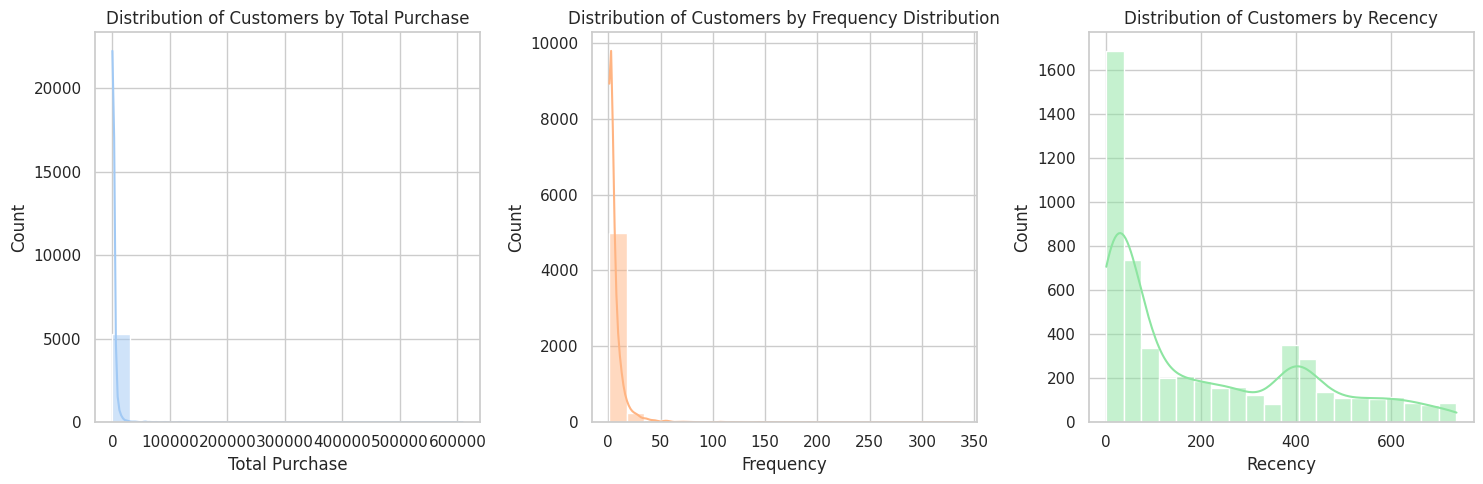

In [ ]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the distribution of Total Purchase
sns.histplot(agg_clean_df['TotalPurchase'], bins=20, kde=True, color=pastel_colors[0], ax=axes[0])
axes[0].set_title('Distribution of Customers by Total Purchase')
axes[0].set_xlabel('Total Purchase')
axes[0].set_ylabel('Count')

# Plot the distribution of Frequency
sns.histplot(agg_clean_df['Frequency'], bins=20, kde=True, color=pastel_colors[1], ax=axes[1])
axes[1].set_title('Distribution of Customers by Frequency Distribution')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Count')

# Plot the distribution of Recency
sns.histplot(agg_clean_df['Recency'], bins=20, kde=True, color=pastel_colors[2], ax=axes[2])
axes[2].set_title('Distribution of Customers by Recency')
axes[2].set_xlabel('Recency')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

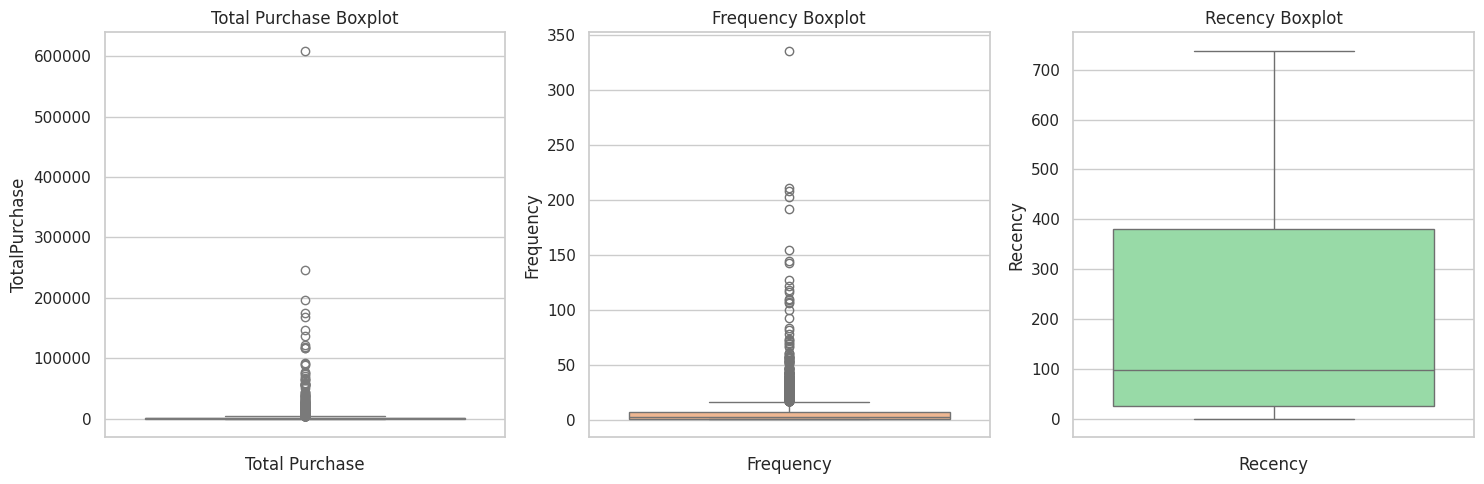

In [ ]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the boxplot for Total Purchase
sns.boxplot(data=agg_clean_df['TotalPurchase'], color=pastel_colors[0], ax=axes[0])
axes[0].set_title('Total Purchase Boxplot')
axes[0].set_xlabel('Total Purchase')

# Plot the boxplot for Frequency
sns.boxplot(data=agg_clean_df['Frequency'], color=pastel_colors[1], ax=axes[1])
axes[1].set_title('Frequency Boxplot')
axes[1].set_xlabel('Frequency')

# Plot the boxplot for Recency
sns.boxplot(data=agg_clean_df['Recency'], color=pastel_colors[2], ax=axes[2])
axes[2].set_title('Recency Boxplot')
axes[2].set_xlabel('Recency')

# Adjust layout
plt.tight_layout()
plt.show()

#Removal of Extreme outliers

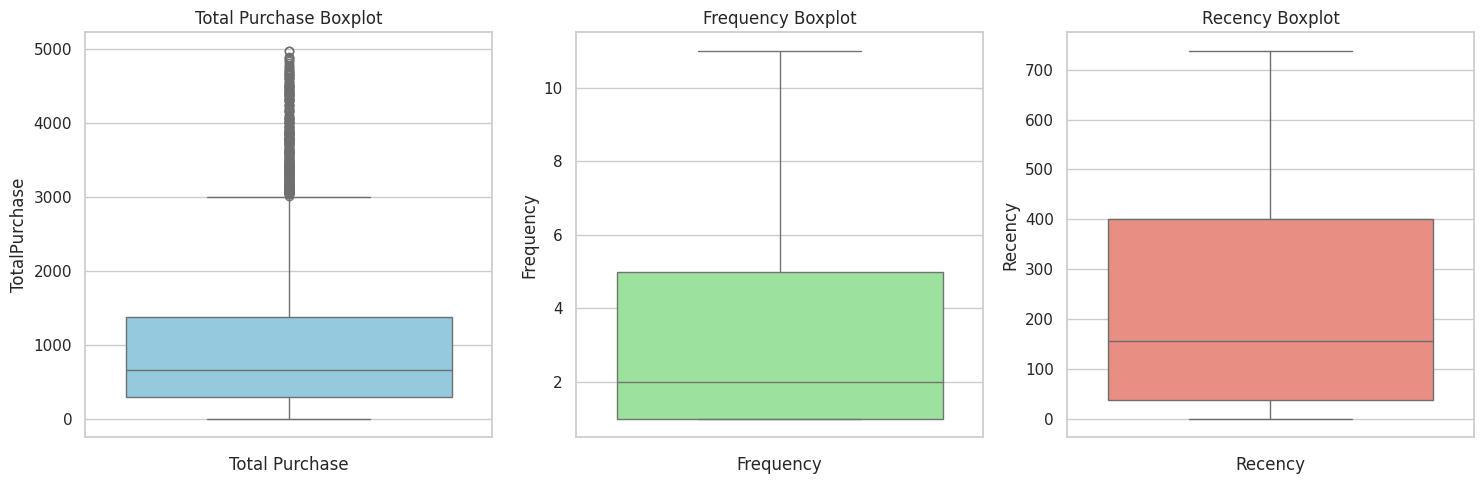

In [ ]:
# Function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the specified columns
agg_clean_df = remove_outliers(agg_clean_df, 'TotalPurchase')
agg_clean_df = remove_outliers(agg_clean_df, 'Frequency')
agg_clean_df = remove_outliers(agg_clean_df, 'Recency')

# Plot the boxplots after removing outliers using seaborn
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=agg_clean_df['TotalPurchase'], color='skyblue')
plt.title('Total Purchase Boxplot')
plt.xlabel('Total Purchase')

plt.subplot(1, 3, 2)
sns.boxplot(data=agg_clean_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=agg_clean_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

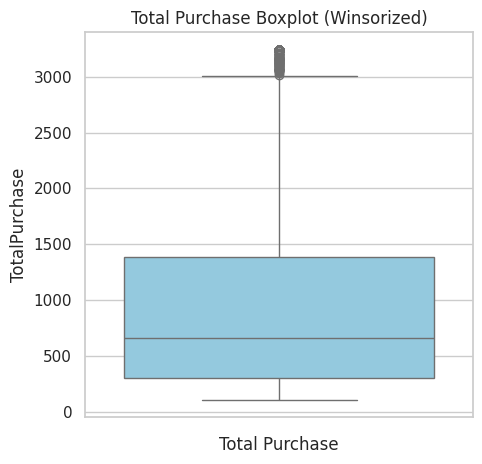

In [ ]:

# Apply winsorization
agg_clean_df['TotalPurchase'] = winsorize(agg_clean_df['TotalPurchase'], limits=[0.05, 0.05])

# Plot the boxplot after winsorization
plt.figure(figsize=(5, 5))
sns.boxplot(data=agg_clean_df['TotalPurchase'], color='skyblue')
plt.title('Total Purchase Boxplot (Winsorized)')
plt.xlabel('Total Purchase')
plt.show()

In [ ]:
#Scaling data
scaler = StandardScaler()
scaled = scaler.fit_transform(agg_clean_df[["TotalPurchase", "Frequency", "Recency"]])
scaled

array([[-0.62867535, -0.8953706 ,  0.82189662],
       [-0.28450032, -0.51201371,  1.20661792],
       [-0.80881812, -0.8953706 ,  1.45997097],
       ...,
       [-0.61615116, -0.8953706 ,  2.02297775],
       [ 0.35520538, -0.51201371,  1.15970069],
       [ 2.52886185,  1.40477071, -0.87650716]])

In [ ]:
#Convert scaled data into df
scaled_df = pd.DataFrame(scaled, index=agg_clean_df.index, columns=("TotalPurchase", "Frequency", "Recency"))

scaled_df.head()

,TotalPurchase,Frequency,Recency
1,-0.628675,-0.895371,0.821897
2,-0.284500,-0.512014,1.206618
3,-0.808818,-0.895371,1.459971
7,-0.512863,-0.895371,1.070558
8,-0.489323,-0.895371,1.070558


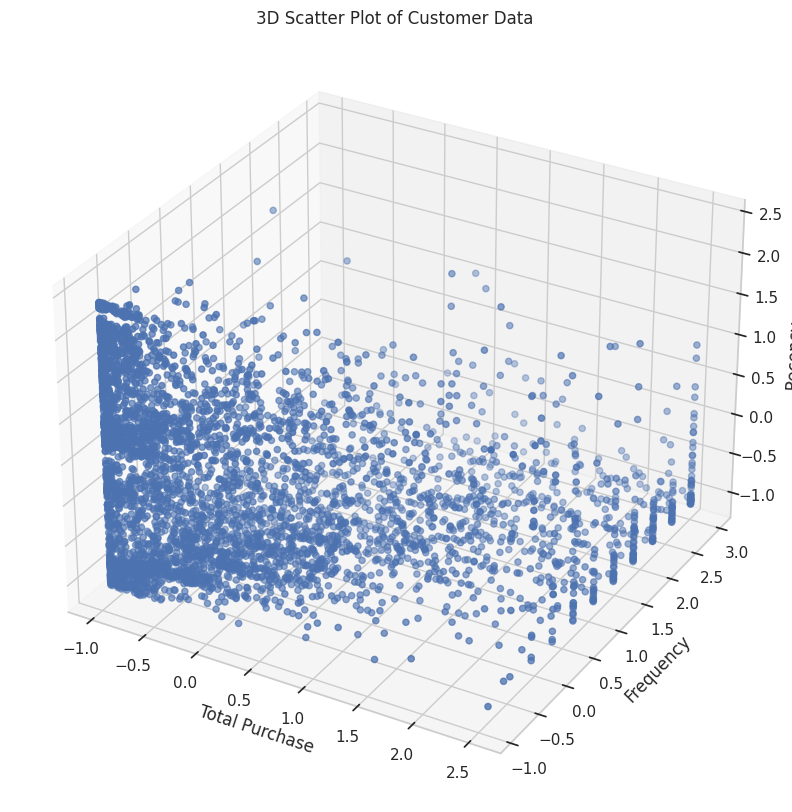

In [ ]:
fig = plt.figure(figsize=(16, 10))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_df["TotalPurchase"], scaled_df["Frequency"], scaled_df["Recency"])

ax.set_xlabel('Total Purchase')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [ ]:
#Find Optimal K Value
max_k = 10

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_df)

    sil_score = silhouette_score(scaled_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

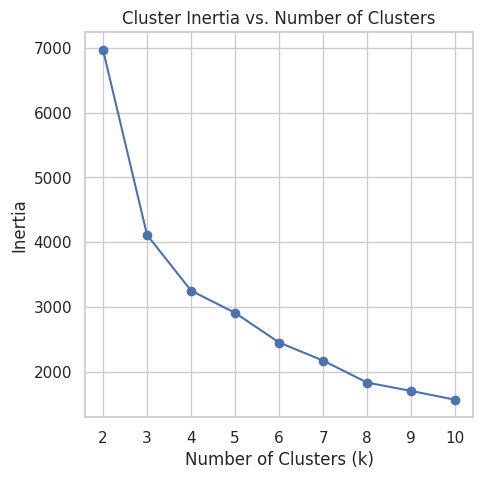

In [ ]:
#Calculater Inertia Values
plt.figure(figsize=(5, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Cluster Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()



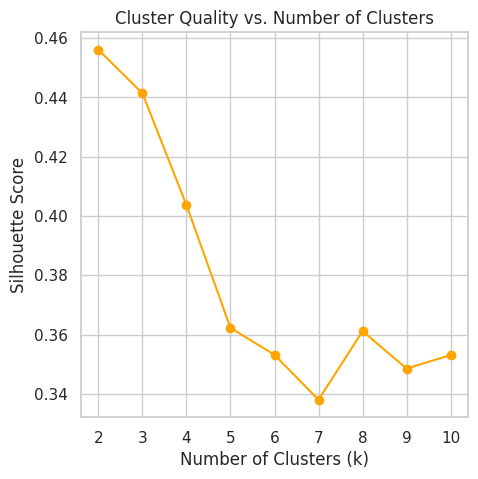

In [ ]:
#Calculate
plt.figure(figsize=(5, 5))
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Cluster Quality vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
#Run KMeansClustering with 3 clusters according to elbow plot.
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_df)
cluster_labels

array([1, 1, 1, ..., 1, 1, 2], dtype=int32)

In [ ]:
scaled_df["Cluster"] = cluster_labels
scaled_df.head()

,TotalPurchase,Frequency,Recency,Cluster
1,-0.628675,-0.895371,0.821897,1
2,-0.284500,-0.512014,1.206618,1
3,-0.808818,-0.895371,1.459971,1
7,-0.512863,-0.895371,1.070558,1
8,-0.489323,-0.895371,1.070558,1


Text(0.5, 0.92, '3D Scatter Plot of Customer Data by Cluster')

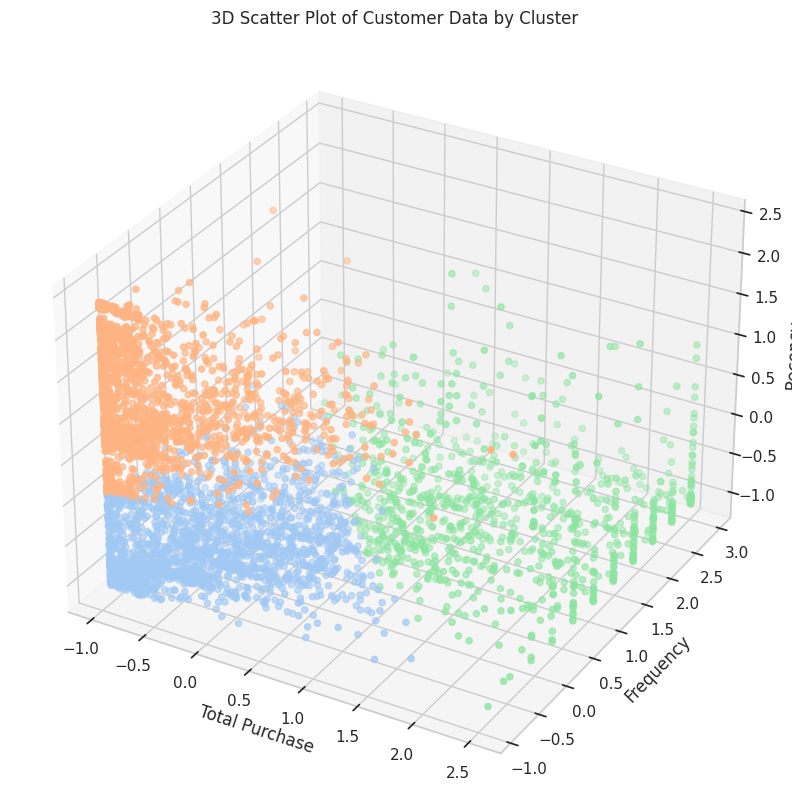

In [ ]:
palette = sns.color_palette("pastel", 3)  # Generate a palette with 3 pastel colors
cluster_colors = {0: palette[0],  # Pastel color 1
                  1: palette[1],  # Pastel color 2
                  2: palette[2]}  # Pastel color 3

# Map cluster colors to the data
colors = scaled_df['Cluster'].map(cluster_colors)

# Plot the 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(scaled_df['TotalPurchase'],
                     scaled_df['Frequency'],
                     scaled_df['Recency'],
                     c=colors,  # Use mapped pastel colors
                     marker='o')

# Set labels and title
ax.set_xlabel('Total Purchase')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

Text(0, 0.5, 'Total Purchase')

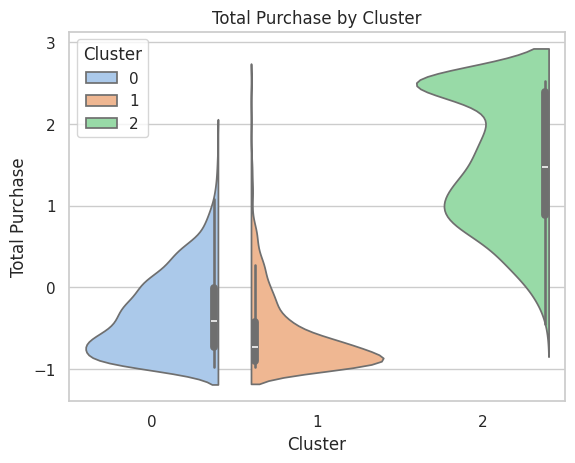

In [ ]:
# First plot for 'TotalPurchase'
sns.violinplot(x=scaled_df['Cluster'], y=scaled_df['TotalPurchase'], palette=cluster_colors, hue=scaled_df["Cluster"], split=True)
plt.title('Total Purchase by Cluster')
plt.ylabel('Total Purchase')

Text(0, 0.5, 'Frequency')

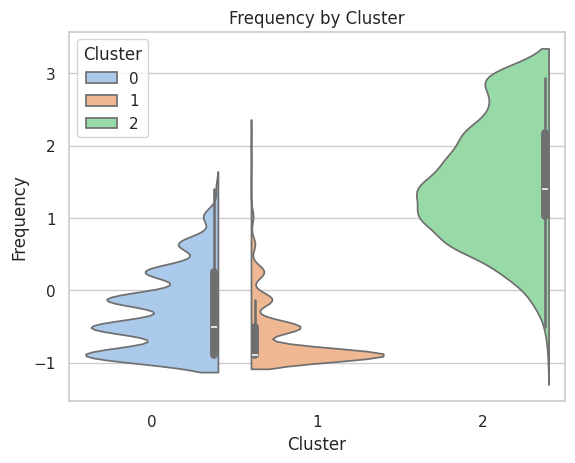

In [ ]:
# Second plot for 'Frequency'
sns.violinplot(x=scaled_df['Cluster'], y=scaled_df['Frequency'], palette=cluster_colors, hue=scaled_df["Cluster"], split=True)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

Text(0, 0.5, 'Recency')

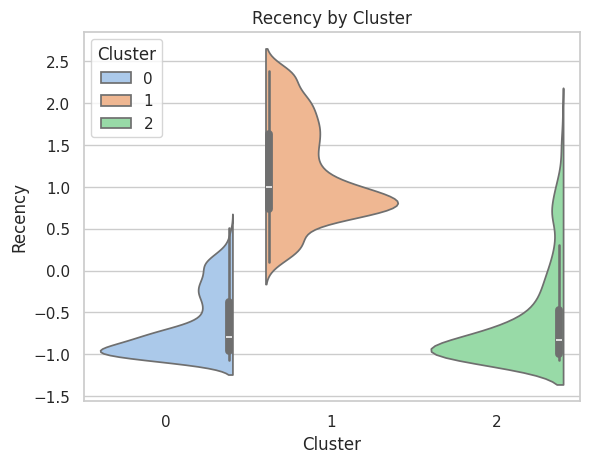

In [ ]:
# Third plot for 'Recency'
sns.violinplot(x=scaled_df['Cluster'], y=scaled_df['Recency'], palette=cluster_colors, hue=scaled_df["Cluster"], split=True)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

<!-- # Cluster 0: Mid Total Purchase, Mid Frequency, Low Recency
# Characteristics: These customers have a moderate spending amount and purchase frequency, but they haven't made recent purchases.

# Marketing Strategies:

# Re-engagement Campaigns: Send personalized emails or messages to remind them of your brand and encourage them to return.
# Special Offers: Provide exclusive discounts or limited-time offers to incentivize them to make a purchase.
# Loyalty Programs: Introduce or highlight loyalty programs to reward them for their past purchases and encourage repeat business.
# Product Recommendations: Use their purchase history to recommend products they might be interested in.
# Cluster 1: Low Total Purchase, Low Frequency, High Recency
# Characteristics: These customers spend less and purchase infrequently, but they have made recent purchases.

# Marketing Strategies:

# Upselling and Cross-Selling: Suggest complementary products or upgrades to increase their average order value.
# Incentivize Repeat Purchases: Offer small discounts or loyalty points for their next purchase to encourage them to buy again soon.
# Personalized Communication: Use personalized messages to make them feel valued and to highlight products they might like based on their recent purchases.
# Engagement Content: Share engaging content, such as how-to guides or product usage tips, to keep them interested in your brand.
# Cluster 2: High Total Purchase, High Frequency, Low Recency
# Characteristics: These customers spend a lot and purchase frequently, but they haven't made recent purchases.

# Marketing Strategies:

# VIP Treatment: Offer exclusive deals, early access to new products, or special events to make them feel valued and appreciated.
# Reactivation Campaigns: Send personalized reactivation emails with special offers to entice them back.
# Loyalty Rewards: Highlight and enhance loyalty rewards to encourage them to return and continue their high spending and frequent purchases.
# Feedback Requests: Ask for feedback on why they haven't shopped recently and use this information to improve your offerings and re-engage them. -->

# Analysis of Clusters

### Cluster 0: Mid Total Purchase, Mid Frequency, Low Recency
These customers spend a moderate amount and shop occasionally, but it's been a while since their last purchase.

### Cluster 1: Low Total Purchase, Low Frequency, High Recency
These customers don't spend much and shop infrequently, but they've made a recent purchase.

### Cluster 2: High Total Purchase, High Frequency, Low Recency
These customers are big spenders and frequent shoppers, but they haven't bought anything recently.

# Recommendations

### Cluster 0
- **Re-engagement Campaigns**: Send them a friendly reminder about your brand with personalized emails or messages.
- **Special Offers**: Tempt them back with exclusive discounts or limited-time deals.
- **Loyalty Programs**: Highlight your loyalty programs to reward their past purchases and encourage them to come back.
- **Product Recommendations**: Suggest products based on their purchase history that they might love.

### Cluster 1
- **Upselling and Cross-Selling**: Recommend complementary products or upgrades to boost their order value.
- **Incentivize Repeat Purchases**: Offer small discounts or loyalty points for their next purchase to encourage them to buy again soon.
- **Personalized Communication**: Make them feel special with personalized messages highlighting products they might like based on their recent purchases.
- **Engagement Content**: Share interesting content like how-to guides or product tips to keep them engaged with your brand.

### Cluster 2
- **VIP Treatment**: Make them feel valued with exclusive deals, early access to new products, or special events.
- **Reactivation Campaigns**: Send personalized reactivation emails with special offers to entice them back.
- **Loyalty Rewards**: Enhance your loyalty rewards to encourage them to return and continue their high spending and frequent purchases.
- **Feedback Requests**: Ask for their feedback on why they haven't shopped recently and use this information to improve your offerings and re-engage them.